In [159]:
#Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import time
from scipy.stats import linregress
import seaborn as sns
import os

In [160]:
all_df = pd.read_csv("../project1/Output_Files/genre.csv")

all_df.head(50)

,Unnamed: 0,Title,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,Revenue,Box Office,Budget,TMDb Score,IMDb,Rotten Tomatoes,Metascore,Awards,Release Year,Release Month
0,0,Jurassic World,Action,Adventure,Science Fiction,Thriller,NaN,1671713208,"$652,385,625",150000000,6.7,7.0,70%,59.0,15 wins & 58 nominations.,2015,6
1,1,Furious 7,Action,Thriller,NaN,NaN,NaN,1515047671,"$353,007,020",190000000,7.3,7.1,82%,67.0,Nominated for 1 Golden Globe. Another 35 wins ...,2015,4
2,2,Avengers: Age of Ultron,Action,Adventure,Science Fiction,NaN,NaN,1405403694,"$459,005,868",250000000,7.3,7.3,75%,66.0,8 wins & 49 nominations.,2015,4
3,3,Minions,Family,Animation,Adventure,Comedy,NaN,1156730962,"$336,045,770",74000000,6.4,6.4,55%,56.0,Nominated for 1 BAFTA Film Award. Another 4 wi...,2015,6
4,4,Spectre,Action,Adventure,Thriller,NaN,NaN,880674609,"$200,074,609",245000000,6.5,6.8,63%,60.0,Won 1 Oscar. Another 7 wins & 36 nominations.,2015,10
5,5,Inside Out,Animation,Family,Adventure,Drama,Comedy,857611174,"$356,921,711",175000000,7.9,8.1,98%,94.0,Won 1 Oscar. Another 99 wins & 116 nominations.,2015,6
6,6,Mission: Impossible - Rogue Nation,Action,Adventure,NaN,NaN,NaN,682330139,"$195,042,377",150000000,7.2,7.4,94%,75.0,6 wins & 26 nominations.,2015,7
7,7,The Hunger Games: Mockingjay - Part 2,Action,Adventure,Science Fiction,NaN,NaN,653428261,"$281,723,902",160000000,6.9,6.6,69%,65.0,16 wins & 34 nominations.,2015,11
8,8,The Martian,Drama,Adventure,Science Fiction,NaN,NaN,630161890,"$228,433,663",108000000,7.7,8.0,91%,80.0,Nominated for 7 Oscars. Another 38 wins & 192 ...,2015,9
9,9,Fifty Shades of Grey,Drama,Romance,Thriller,NaN,NaN,571006128,"$166,167,230",4000000,5.9,4.1,24%,46.0,Nominated for 1 Oscar. Another 9 wins & 27 nom...,2015,2


In [161]:
#all_df["Genre"] = all_df["Genre_1"] + " " + all_df["Genre_2"] 

clean_df = all_df[["Title","Budget","Revenue","Rotten Tomatoes","IMDb","Awards","Release Year","Genre_1"]]

clean_df.head(10)

,Title,Budget,Revenue,Rotten Tomatoes,IMDb,Awards,Release Year,Genre_1
0,Jurassic World,150000000,1671713208,70%,7.0,15 wins & 58 nominations.,2015,Action
1,Furious 7,190000000,1515047671,82%,7.1,Nominated for 1 Golden Globe. Another 35 wins ...,2015,Action
2,Avengers: Age of Ultron,250000000,1405403694,75%,7.3,8 wins & 49 nominations.,2015,Action
3,Minions,74000000,1156730962,55%,6.4,Nominated for 1 BAFTA Film Award. Another 4 wi...,2015,Family
4,Spectre,245000000,880674609,63%,6.8,Won 1 Oscar. Another 7 wins & 36 nominations.,2015,Action
5,Inside Out,175000000,857611174,98%,8.1,Won 1 Oscar. Another 99 wins & 116 nominations.,2015,Animation
6,Mission: Impossible - Rogue Nation,150000000,682330139,94%,7.4,6 wins & 26 nominations.,2015,Action
7,The Hunger Games: Mockingjay - Part 2,160000000,653428261,69%,6.6,16 wins & 34 nominations.,2015,Action
8,The Martian,108000000,630161890,91%,8.0,Nominated for 7 Oscars. Another 38 wins & 192 ...,2015,Drama
9,Fifty Shades of Grey,4000000,571006128,24%,4.1,Nominated for 1 Oscar. Another 9 wins & 27 nom...,2015,Drama


In [133]:
action_df = clean_df.loc[clean_df["Genre_1"] == "Action"]
action_df.head(10)

,Title,Budget,Revenue,Rotten Tomatoes,IMDb,Awards,Release Year,Genre_1
0,Jurassic World,150000000,1671713208,70%,7.0,15 wins & 58 nominations.,2015,Action
1,Furious 7,190000000,1515047671,82%,7.1,Nominated for 1 Golden Globe. Another 35 wins ...,2015,Action
2,Avengers: Age of Ultron,250000000,1405403694,75%,7.3,8 wins & 49 nominations.,2015,Action
4,Spectre,245000000,880674609,63%,6.8,Won 1 Oscar. Another 7 wins & 36 nominations.,2015,Action
6,Mission: Impossible - Rogue Nation,150000000,682330139,94%,7.4,6 wins & 26 nominations.,2015,Action
7,The Hunger Games: Mockingjay - Part 2,160000000,653428261,69%,6.6,16 wins & 34 nominations.,2015,Action
13,San Andreas,110000000,473990832,49%,6.1,2 wins & 10 nominations.,2015,Action
16,Mad Max: Fury Road,150000000,378858340,97%,8.1,Won 6 Oscars. Another 239 wins & 231 nominations.,2015,Action
19,Captain America: Civil War,245000000,2068223624,90%,7.8,16 wins & 72 nominations.,2016,Action
20,Rogue One: A Star Wars Story,150000000,1671713208,84%,7.8,Nominated for 2 Oscars. Another 24 wins & 81 n...,2016,Action


In [154]:
family_df = clean_df.loc[clean_df["Genre_1"] == "Family"]
family_df.head(12)

,Title,Budget,Revenue,Rotten Tomatoes,IMDb,Awards,Release Year,Genre_1
3,Minions,74000000,1156730962,55%,6.4,Nominated for 1 BAFTA Film Award. Another 4 wi...,2015,Family
14,Hotel Transylvania 2,80000000,473226958,55%,6.7,1 win & 10 nominations.,2015,Family
23,The Jungle Book,74000000,1156730962,94%,7.4,Won 1 Oscar. Another 32 wins & 54 nominations.,2016,Family
33,Kung Fu Panda 3,80000000,473226958,87%,7.1,1 win & 10 nominations.,2016,Family
41,Jumanji: Welcome to the Jungle,74000000,1156730962,76%,6.9,6 wins & 19 nominations.,2017,Family
52,Transformers: The Last Knight,80000000,473226958,15%,5.2,5 wins & 19 nominations.,2017,Family
61,Aquaman,74000000,1156730962,65%,6.9,2 wins & 39 nominations.,2018,Family
71,Ralph Breaks the Internet,80000000,473226958,88%,7.0,Nominated for 1 Oscar. Another 3 wins & 66 nom...,2018,Family
80,Captain Marvel,74000000,1156730962,79%,6.9,8 wins & 52 nominations.,2019,Family
88,It Chapter Two,80000000,473226958,62%,6.5,5 wins & 30 nominations.,2019,Family


In [141]:
sf_df = clean_df.loc[clean_df["Genre_1"] == "Science Fiction"]
sf_df.head(10)

,Title,Budget,Revenue,Rotten Tomatoes,IMDb,Awards,Release Year,Genre_1
12,Ant-Man,130000000,519311965,82%,7.3,Nominated for 1 BAFTA Film Award. Another 4 wi...,2015,Science Fiction
15,Terminator Genisys,155000000,440603537,27%,6.3,10 nominations.,2015,Science Fiction
34,La La Land,155000000,440603537,90%,8.0,Won 6 Oscars. Another 236 wins & 287 nominations.,2016,Science Fiction
50,Justice League,130000000,519311965,40%,6.2,2 wins & 13 nominations.,2017,Science Fiction
53,Kong: Skull Island,155000000,440603537,75%,6.6,Nominated for 1 Oscar. Another 1 win & 20 nomi...,2017,Science Fiction
69,Operation Red Sea,130000000,519311965,80%,6.7,31 wins & 41 nominations.,2018,Science Fiction
72,The Grinch,155000000,440603537,59%,6.3,1 win & 18 nominations.,2018,Science Fiction
89,Pokémon Detective Pikachu,155000000,440603537,67%,6.6,9 nominations.,2019,Science Fiction


In [139]:
drama_df = clean_df.loc[clean_df["Genre_1"] == "Drama"]
drama_df.head(10)

,Title,Budget,Revenue,Rotten Tomatoes,IMDb,Awards,Release Year,Genre_1
8,The Martian,108000000,630161890,91%,8.0,Nominated for 7 Oscars. Another 38 wins & 192 ...,2015,Drama
9,Fifty Shades of Grey,4000000,571006128,24%,4.1,Nominated for 1 Oscar. Another 9 wins & 27 nom...,2015,Drama
28,Suicide Squad,108000000,630161890,26%,6.0,Won 1 Oscar. Another 16 wins & 40 nominations.,2016,Drama
29,Moana,4000000,571006128,95%,7.6,Nominated for 2 Oscars. Another 20 wins & 88 n...,2016,Drama
46,Wonder Woman,108000000,630161890,93%,7.4,25 wins & 72 nominations.,2017,Drama
47,Coco,4000000,571006128,97%,8.4,Won 2 Oscars. Another 109 wins & 40 nominations.,2017,Drama
65,Deadpool 2,108000000,630161890,84%,7.7,6 wins & 52 nominations.,2018,Drama
66,Fantastic Beasts: The Crimes of Grindelwald,4000000,571006128,36%,6.6,Nominated for 2 BAFTA Film Awards. Another 3 w...,2018,Drama
84,Jumanji: The Next Level,108000000,630161890,71%,6.6,1 win & 10 nominations.,2019,Drama


In [131]:
genre = clean_df.groupby(["Genre_1"])
_df = genre.count()
genre_df.head(20)

,Title,Budget,Revenue,Rotten Tomatoes,IMDb,Awards,Release Year
Genre_1,,,,,,,
Action,42,42,42,42,42,42,42
Adventure,5,5,5,5,5,5,5
Animation,4,4,4,4,4,4,4
Drama,9,9,9,9,9,9,9
Family,10,10,10,10,10,10,10
Fantasy,5,5,5,5,5,5,5
Romance,5,5,5,5,5,5,5
Science Fiction,8,8,8,8,8,8,8
Western,5,5,5,5,5,5,5


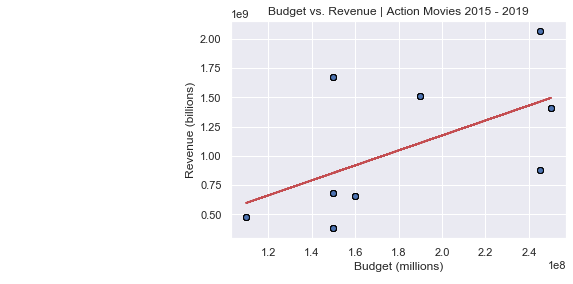

In [149]:
x = action_df["Budget"]
y = action_df["Revenue"]

plt.scatter(x, y, edgecolors = 'black', linewidths=1, marker="o")

plt.title("Budget vs. Revenue | Action Movies 2015 - 2019")
plt.xlabel("Budget (millions)")
plt.ylabel("Revenue (billions)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_value = x * slope + intercept 

analysis = (f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}")

plt.plot(x, regress_value, "r-")

plt.annotate(analysis,(1.2, 1.50), color = "red", fontsize = 20)

plt.show()

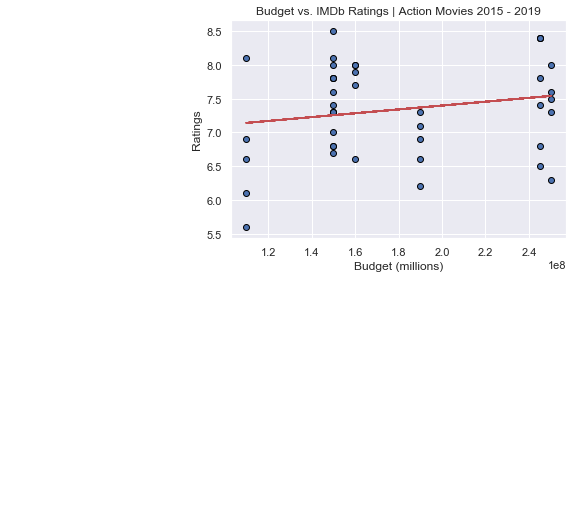

In [162]:
x = action_df["Budget"]
y = action_df["IMDb"]

plt.scatter(x, y, edgecolors = 'black', linewidths=1, marker="o")

plt.title("Budget vs. IMDb Ratings | Action Movies 2015 - 2019")
plt.xlabel("Budget (millions)")
plt.ylabel("Ratings")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_value = x * slope + intercept 

analysis = (f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}")

plt.plot(x, regress_value, "r-")

plt.annotate(analysis,(1.2, 1.50), color = "red", fontsize = 20)

plt.show()

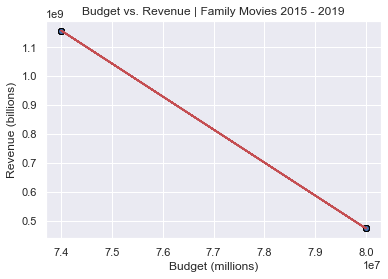

In [157]:
x = family_df["Budget"]
y = family_df["Revenue"]

plt.scatter(x, y, edgecolors = 'black', linewidths=1, marker="o")

#plt.xlim(7.4, 8.0)
#plt.ylim(.50, 2.00)

plt.title("Budget vs. Revenue | Family Movies 2015 - 2019")
plt.xlabel("Budget (millions)")
plt.ylabel("Revenue (billions)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_value = x * slope + intercept 

analysis = (f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}")

plt.plot(x, regress_value, "r-")

#plt.annotate(analysis,(1.2, 1.50), color = "red", fontsize = 20)

plt.show()

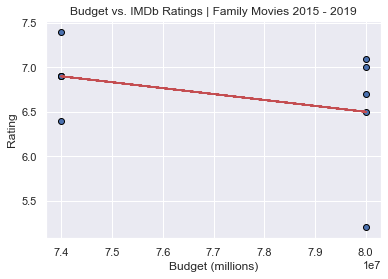

In [158]:
x = family_df["Budget"]
y = family_df["IMDb"]

plt.scatter(x, y, edgecolors = 'black', linewidths=1, marker="o")

#plt.xlim(7.4, 8.0)
#plt.ylim(.50, 2.00)

plt.title("Budget vs. IMDb Ratings | Family Movies 2015 - 2019")
plt.xlabel("Budget (millions)")
plt.ylabel("Rating")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_value = x * slope + intercept 

analysis = (f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}")

plt.plot(x, regress_value, "r-")

#plt.annotate(analysis,(1.2, 1.50), color = "red", fontsize = 20)

plt.show()

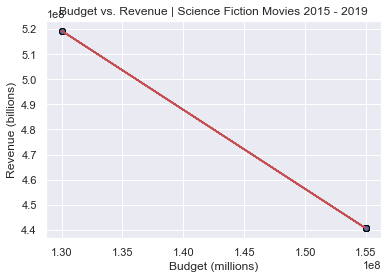

In [163]:
x = sf_df["Budget"]
y = sf_df["IMDb"]

plt.scatter(x, y, edgecolors = 'black', linewidths=1, marker="o")

#plt.xlim(7.4, 8.0)
#plt.ylim(.50, 2.00)

plt.title("Budget vs. Revenue | Science Fiction Movies 2015 - 2019")
plt.xlabel("Budget (millions)")
plt.ylabel("Revenue (billions)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_value = x * slope + intercept 

analysis = (f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}")

plt.plot(x, regress_value, "r-")

#plt.annotate(analysis,(1.2, 1.50), color = "red", fontsize = 20)

plt.show()

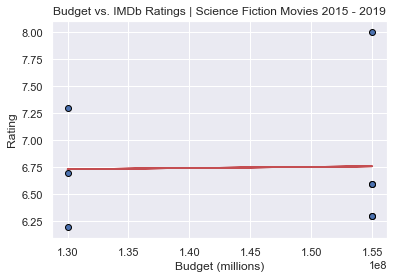

In [168]:
x = sf_df["Budget"]
y = sf_df["IMDb"]

plt.scatter(x, y, edgecolors = 'black', linewidths=1, marker="o")

#plt.xlim(7.4, 8.0)
#plt.ylim(.50, 2.00)

plt.title("Budget vs. IMDb Ratings | Science Fiction Movies 2015 - 2019")
plt.xlabel("Budget (millions)")
plt.ylabel("Rating")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_value = x * slope + intercept 

analysis = (f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}")

plt.plot(x, regress_value, "r-")

#plt.annotate(analysis,(1.2, 1.50), color = "red", fontsize = 20)

plt.show()

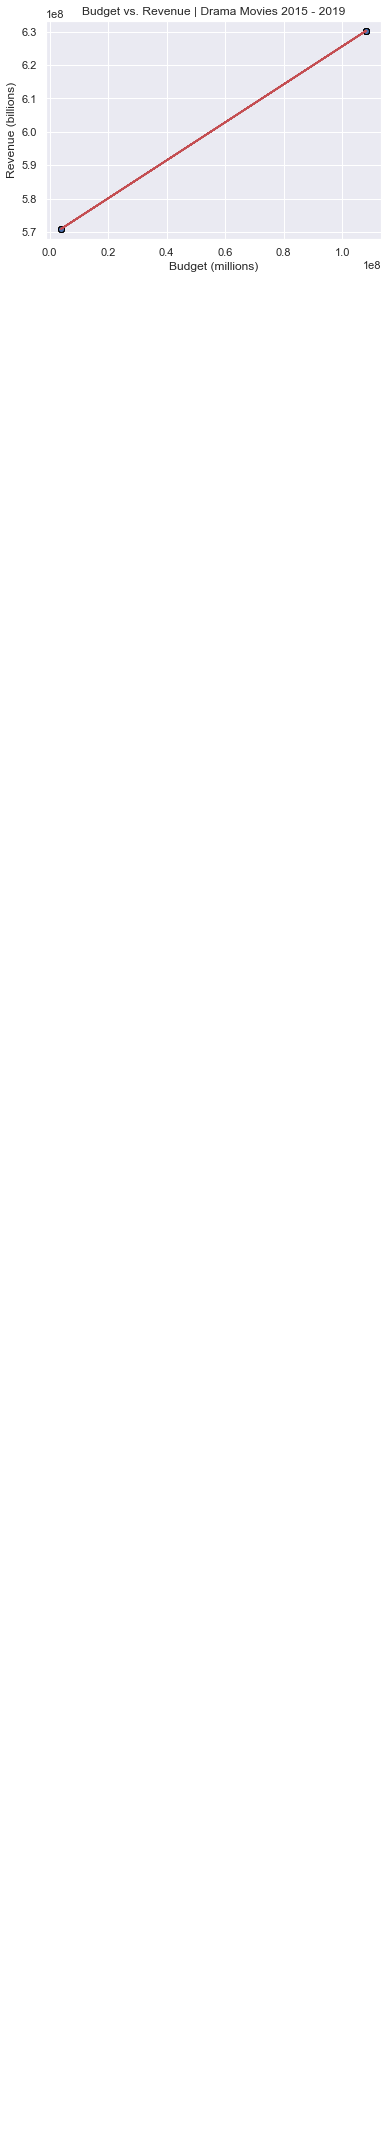

In [165]:
x = drama_df["Budget"]
y = drama_df["Revenue"]

plt.scatter(x, y, edgecolors = 'black', linewidths=1, marker="o")

plt.title("Budget vs. Revenue | Drama Movies 2015 - 2019")
plt.xlabel("Budget (millions)")
plt.ylabel("Revenue (billions)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_value = x * slope + intercept 

analysis = (f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}")

plt.plot(x, regress_value, "r-")

plt.annotate(analysis,(1.2, 1.50), color = "red", fontsize = 20)

plt.show()

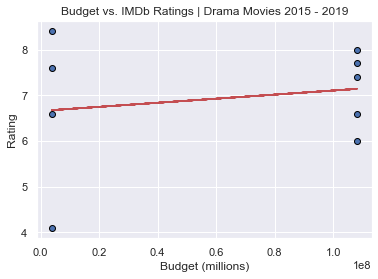

In [166]:
x = drama_df["Budget"]
y = drama_df["IMDb"]

plt.scatter(x, y, edgecolors = 'black', linewidths=1, marker="o")

plt.title("Budget vs. IMDb Ratings | Drama Movies 2015 - 2019")
plt.xlabel("Budget (millions)")
plt.ylabel("Rating")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_value = x * slope + intercept 

analysis = (f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}")

plt.plot(x, regress_value, "r-")

#plt.annotate(analysis,(1.2, 1.50), color = "red", fontsize = 20)

plt.show()